# Project: Kernelization, Kernel Tricks
# Project 3 Solution
<font size = "3"><p> StudentID: 200311941</p></font>
<font size = "3"><p> UnityID: asshahan</p></font>
<font size = "3"><p> CSC 591 Graph Data Mining</p></font>

In [1]:
# Imports
%matplotlib inline 
import numpy as np
from sklearn import svm as skSVM
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import classification_report
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import KMeans, SpectralClustering

### Exercise 1: Generating the data sets.

Write a script that generates three data sets in a 2-dimensional space, defined as follows:
1. BAD_kmeans: a data set for which the k-means clustering algorithm will not perform well.
2. BAD_pca: a data set for which the Principal Component Analysis (PCA) dimension reduction method upon projection of the original points onto 1-dimensional space (i.e., the first eigenvector) will not perform well.
3. BAD_svm: a data set for which the linear Support Vector Machine (SVM) supervised classification method using two classes of points (positive and negative)  will not perform well.
4. Plot each data set in a 2-dimensional space.
    
Note: If appropriate, the same data set may be used for multiple parts.

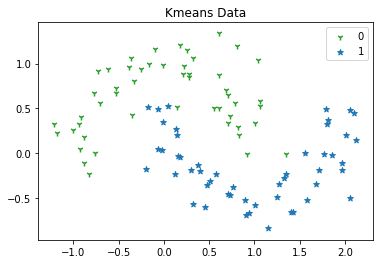

In [38]:
# Generating dataset such that the algorithms will not perform well

# For Kmeans
kmeans, kmeansLabels = make_moons(n_samples = 100, random_state = 0, noise = 0.2)
# Plot dataset
l0 = kmeans[kmeansLabels == 0]
l1 = kmeans[kmeansLabels == 1]
plt.scatter(l0[:,0], l0[:,1], color = ['tab:green'], marker = '1')
plt.scatter(l1[:,0], l1[:,1], color = ['tab:blue'], marker = '*')
plt.legend(kmeansLabels)
plt.title("Kmeans Data")
plt.show()

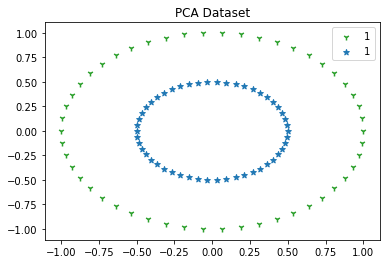

In [39]:
# For PCA
pca, pcaLabels = make_circles(n_samples=100, factor=0.5)
# Plot dataset
l0 = pca[pcaLabels == 0]
l1 = pca[pcaLabels == 1]
plt.scatter(l0[:,0], l0[:,1], color = ['tab:green'], marker = '1')
plt.scatter(l1[:,0], l1[:,1], color = ['tab:blue'], marker = '*')
plt.legend(pcaLabels)
plt.title("PCA Dataset")
plt.show()

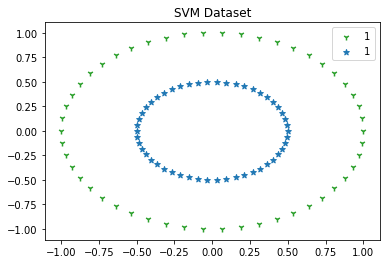

In [40]:
# For SVM
# Using the same dataset as PCA
svm, svmLabels = pca, pcaLabels
# Plot dataset
l0 = svm[svmLabels == 0]
l1 = svm[svmLabels == 1]
plt.scatter(l0[:,0], l0[:,1], color = ['tab:green'], marker = '1')
plt.scatter(l1[:,0], l1[:,1], color = ['tab:blue'], marker = '*')
plt.legend(svmLabels)
plt.title("SVM Dataset")
plt.show()

### Exercise 2: Evaluating the "badness" of the data mining methods.

Write a script that uses the BAD data sets in Exercise 1, runs the corresponding data mining method, produces the output of the method, and evaluates the performance of the method using (e.g., 10-fold) cross-validation and various performance metrics (e.g., variance, precision, recall, F1 measure). Note that not all metrics can be equally applied to every method. Report the performance metrics used and a summary of the results obtained. Reading the chapter “Performance Metrics for Graph Mining Tasks” by Kanchana Padmanabhan and John Jenkins in the resources for performance metrics is strongly encouraged for performing this exercise. 

In [53]:
# Perform the respective data mining methods and evaluate performance

# --------------------Perform kmeans--------------------
def evaluateKmeans(kmeans):
    km = KMeans(n_clusters = 2, random_state = 0)
    kmOutput = km.fit(kmeans)
    kmClusters = km.predict(kmeans)

    # 10-fold cross validation score
    print("Cross validation score: ", np.mean(cross_val_score(km, kmeans, kmeansLabels, cv = 10)))

    # Performance metrics
    print("Performance Metrics:")
    print(classification_report(kmeansLabels, kmClusters))

# Call the function
print("--------------------KMeans--------------------")
evaluateKmeans(kmeans)

--------------------KMeans--------------------
('Cross validation score: ', -5.03109664718881)
Performance Metrics:
              precision    recall  f1-score   support

           0       0.23      0.22      0.22        50
           1       0.25      0.26      0.25        50

   micro avg       0.24      0.24      0.24       100
   macro avg       0.24      0.24      0.24       100
weighted avg       0.24      0.24      0.24       100



In [54]:
# --------------------Perform PCA--------------------
def evaluatePca(pca):
    p = PCA(n_components = 1)
    pcaOutput = p.fit(pca)

    # 10-fold cross validation score
    print("Cross validation score: ", np.mean(cross_val_score(p, pca, pcaLabels, cv = 10)))

    # Variance for PCA
    print("Variance: ", p.explained_variance_ratio_[0])

# Call the function
print("--------------------PCA--------------------")
evaluatePca(pca)

--------------------PCA--------------------
('Cross validation score: ', -1.7123734495142457)
('Variance: ', 0.5)


In [55]:
# --------------------Perform SVM--------------------
def evaluateSvm(svm, kernel):
    # Create train and test data
    xTrainSVM, xTestSVM, yTrainSVM, yTestSVM = train_test_split(svm, svmLabels, test_size = 0.35, random_state = 0)

    s = skSVM.SVC(kernel = kernel).fit(xTrainSVM, yTrainSVM)
    svmOutput = s.predict(xTestSVM)

    # 10-fold cross validation score
    print("Cross validation score: ", s.score(xTestSVM, yTestSVM))

    # Performance metrics
    print("Performance Metrics:")
    print(classification_report(yTestSVM, svmOutput))
    print("Number of support vectors: ",s.n_support_)
    
# Call the function
print("--------------------SVM--------------------")
evaluateSvm(svm, "linear")

--------------------SVM--------------------
('Cross validation score: ', 0.37142857142857144)
Performance Metrics:
              precision    recall  f1-score   support

           0       0.33      0.22      0.27        18
           1       0.39      0.53      0.45        17

   micro avg       0.37      0.37      0.37        35
   macro avg       0.36      0.38      0.36        35
weighted avg       0.36      0.37      0.36        35

('Number of support vectors: ', array([31, 31], dtype=int32))


### Exercise 3: Kernelizing the methods.

Write a script that uses the kernelized version of each of the data mining methods in Exercise 2.
1. Choose at least two kernels for each method.
2. Use the same performance metrics as in Exercise 2 and compare the performance of the original un-kernelized version of the method versus the performance obtained after applying the kernel trick.
3. Do you observe a difference in performance when you use different kernels?
4. What are the best performance results you obtain by trying different kernels and kernel parameters? Also, make sure to report the number of support vectors for the SVM (a good rule of thumb is to strive for no more than 35%-50% support vectors to avoid model overfitting).

### Kmeans

In [56]:
# Kmeans
sKmeans = pairwise_kernels(kmeans, metric = "sigmoid")
rbfKmeans = pairwise_kernels(kmeans, metric = "rbf")
print("Using Sigmoid Kernel")
evaluateKmeans(sKmeans)
print("\n\n")
print("Using RBF Kernel")
evaluateKmeans(rbfKmeans)

Using Sigmoid Kernel
('Cross validation score: ', -17.325304944208323)
Performance Metrics:
              precision    recall  f1-score   support

           0       0.36      0.54      0.43        50
           1       0.04      0.02      0.03        50

   micro avg       0.28      0.28      0.28       100
   macro avg       0.20      0.28      0.23       100
weighted avg       0.20      0.28      0.23       100




Using RBF Kernel
('Cross validation score: ', -42.81092744405306)
Performance Metrics:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        50
           1       0.77      0.74      0.76        50

   micro avg       0.76      0.76      0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



### PCA

In [57]:
# PCA
sPca = pairwise_kernels(pca, metric = "sigmoid")
rbfPca = pairwise_kernels(pca, metric = "rbf")
print("Using Sigmoid Kernel")
evaluatePca(sPca)
print("\n\n")
print("Using RBF Kernel")
evaluatePca(rbfPca)

Using Sigmoid Kernel
('Cross validation score: ', 107.52553175053274)
('Variance: ', 0.4825520869970714)



Using RBF Kernel
('Cross validation score: ', 18.124412860994276)
('Variance: ', 0.416702566662632)


### SVM

In [58]:
# SVM
sSvm = pairwise_kernels(svm, metric = "sigmoid")
rbfSvm = pairwise_kernels(svm, metric = "rbf")
print("Using Sigmoid Kernel")
evaluateSvm(sSvm, "sigmoid")
print("\n\n")
print("Using RBF Kernel")
evaluateSvm(rbfSvm, "rbf")

Using Sigmoid Kernel
('Cross validation score: ', 0.4857142857142857)
Performance Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.49      1.00      0.65        17

   micro avg       0.49      0.49      0.49        35
   macro avg       0.24      0.50      0.33        35
weighted avg       0.24      0.49      0.32        35

('Number of support vectors: ', array([32, 32], dtype=int32))



Using RBF Kernel
('Cross validation score: ', 1.0)
Performance Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17

   micro avg       1.00      1.00      1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

('Number of support vectors: ', array([31, 31], dtype=int32))


### Analyzing the results
Results obtained after kernelization are better than without kernelization. The two kernels used are Sigmoid and RBF.


**Kmeans:** The performance of Kmeans improved because of kernelization. Results after using RBF are significantly better than sigmoid.

**PCA:** The variance of PCA decreased to 48% and 41% from 50% after using the two techniques.

**SVM:** Both the techniques improved the results in SVM and the number of support vectors is [32, 32] and [31, 31]. However usng RBF we got a perfect precision of 1.

The overall performance of RBF was better than sigmoid by a small margin.

### Exercise 4: Pipelining.

Dimension reduction is often used as a key data pre-processing step for other data mining methods downstream the end-to-end data analysis. In this exercise, you will use unsupervised kernel PCA as a pre-processing step for clustering. Later in the course, we will use supervised dimension reduction methods as a pre-processing step for supervised classification methods.
1. Generalize your BAD_kmeans data set to very high-dimensional space (d>>2).
2. Show that the k-means clustering algorithm does not perform well on that data.
3. Apply the kernel PCA method to this high dimensional data set and identify the number (m<<d) of principal components (i.e., eigenvectors) that provide a reasonably good low-dimensional approximation of your data (i.e., based on eigenvalue distribution). How much total variability of the data will be preserved upon using this low-dimensional representation?
4. Project your original data onto the top m eigenvectors corresponding to the largest eigenvalues.
5. Run the k-means clustering algorithm on the projected low dimensional data.
6. Compare the performance of the k-means clustering algorithm on the d-dimensional original data vs. the m-dimensional projected data. Has the performance improved?
7. If you run the kernel k-means clustering algorithm on the original data, will you get better or worse performance? Discuss the pros and cons of using kernel k-means on the original data directly versus applying kernel PCA as a pre-processing step and then running the k-means clustering algorithm on the low-dimensional data.

In [59]:
rbfsample = RBFSampler(n_components = 100)
high = rbfsample.fit_transform(kmeans)
highLabels = kmeansLabels

# --------------------Perform kmeans--------------------
evaluateKmeans(high)

('Cross validation score: ', -4.924965672875539)
Performance Metrics:
              precision    recall  f1-score   support

           0       0.16      0.14      0.15        50
           1       0.22      0.24      0.23        50

   micro avg       0.19      0.19      0.19       100
   macro avg       0.19      0.19      0.19       100
weighted avg       0.19      0.19      0.19       100



**Evaluating:** Performance of Kmeans is very poor on high dimensional data.

[(0.39916332842438335+0j), (0.20730960981181346+0j), (0.111431946116027+0j), (0.09122190847914954+0j), (0.04633580240522907+0j), (0.03669197498483014+0j), (0.030418436627759216+0j), (0.02678095094600012+0j), (0.014826906399286653+0j), (0.00987069748562754+0j)]


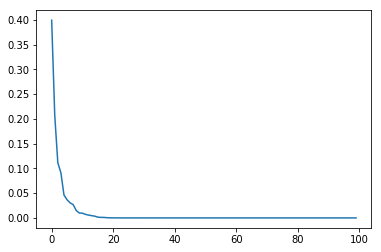

In [61]:
high = np.cov(high)
val, vec = np.linalg.eig(high)
val = sorted(val, reverse=True)
print val[:10]

plt.plot(val)
plt.show()

In [62]:
# Apply kernel pca and run kmeans on new data
kernelpca = KernelPCA(n_components = 1, kernel = "rbf")
pcaHigh = kernelpca.fit_transform(high)

evaluateKmeans(pcaHigh)

('Cross validation score: ', -2.3383371339912053e-05)
Performance Metrics:
              precision    recall  f1-score   support

           0       0.05      0.04      0.05        50
           1       0.24      0.30      0.27        50

   micro avg       0.17      0.17      0.17       100
   macro avg       0.15      0.17      0.16       100
weighted avg       0.15      0.17      0.16       100



### Evaluation:
Chosen m value = 1.

Kernelized kmeans has a poor performance on the original high dimensional data. It is computationally expensive to run kmeans on all dimensions of the original data. However, on the reduced dimensional data (using kernel pca), the algorithm performs much better.